**KNN**

##### According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
##### For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
df_2c = pd.read_csv('2Classdata.csv')




# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
df_2c.describe(include = 'all')
#There are 2 unique values in class column

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal
freq,NaN,NaN,NaN,NaN,NaN,NaN,210
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [4]:
df_2c.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [9]:
df_2c.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [10]:
df_2c.isnull().sum()
# There are no null values in the data set.so we are good to go ahead.

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [11]:
df_2c.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [12]:
df_2c['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [13]:
df_2c.skew()

pelvic_incidence            0.520440
pelvic_tilt numeric         0.676553
lumbar_lordosis_angle       0.599451
sacral_slope                0.792577
pelvic_radius              -0.176835
degree_spondylolisthesis    4.317954
dtype: float64

# pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis are Right Skewed
# pelvic_radius is Left Skewed.
# degree_spondylolisthesis has high skewness with value 4.31. which is evident from the visuaization below.


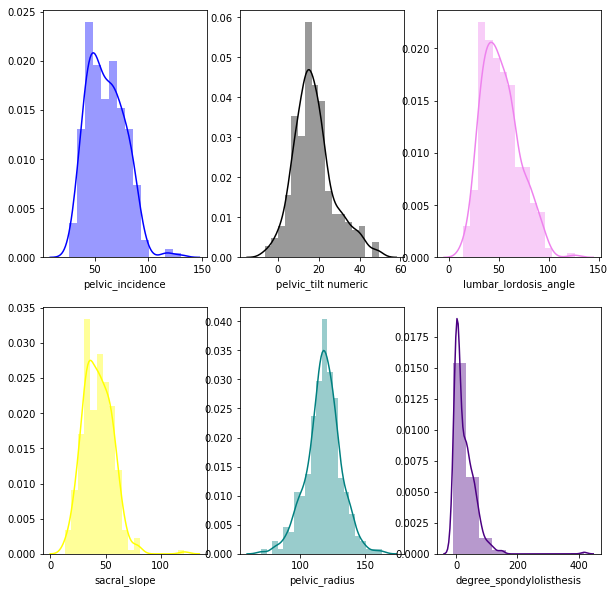

In [19]:
fig , axes = plt.subplots(figsize = (10,10), ncols = 3, nrows = 2)
sns.distplot(df_2c['pelvic_incidence'], ax = axes[0,0], color = 'blue')
sns.distplot(df_2c['pelvic_tilt numeric'], ax = axes[0,1], color = 'black')
sns.distplot(df_2c['lumbar_lordosis_angle'], ax = axes[0,2],color = 'violet')
sns.distplot(df_2c['sacral_slope'], ax = axes[1,0], color = 'yellow')
sns.distplot(df_2c['pelvic_radius'], ax = axes[1,1], color = 'teal')
sns.distplot(df_2c['degree_spondylolisthesis'], ax = axes[1,2], color = 'indigo', bins = 10)


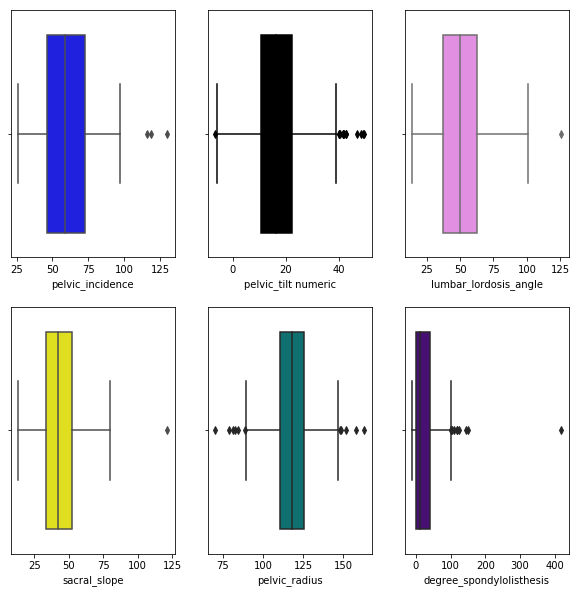

In [20]:
fig , axes = plt.subplots(figsize = (10,10), ncols = 3, nrows = 2)
sns.boxplot(df_2c['pelvic_incidence'], ax = axes[0,0], color = 'blue')
sns.boxplot(df_2c['pelvic_tilt numeric'], ax = axes[0,1], color = 'black')
sns.boxplot(df_2c['lumbar_lordosis_angle'], ax = axes[0,2],color = 'violet')
sns.boxplot(df_2c['sacral_slope'], ax = axes[1,0], color = 'yellow')
sns.boxplot(df_2c['pelvic_radius'], ax = axes[1,1], color = 'teal')
sns.boxplot(df_2c['degree_spondylolisthesis'], ax = axes[1,2], color = 'indigo')

# From above boxplots we can conclude that -
# pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis have outliers at right tail
# pelvic_radius has outliers at both left and right tail.

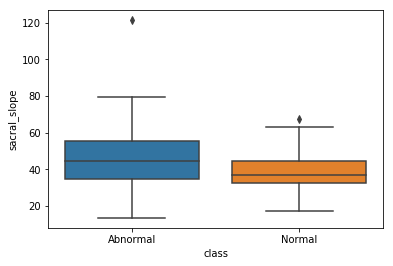

In [19]:
sns.boxplot('class', 'sacral_slope',  data = df_2c )

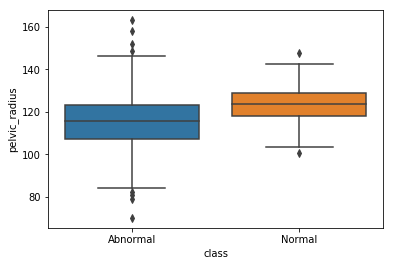

In [22]:
sns.boxplot('class', 'pelvic_radius',  data = df_2c )

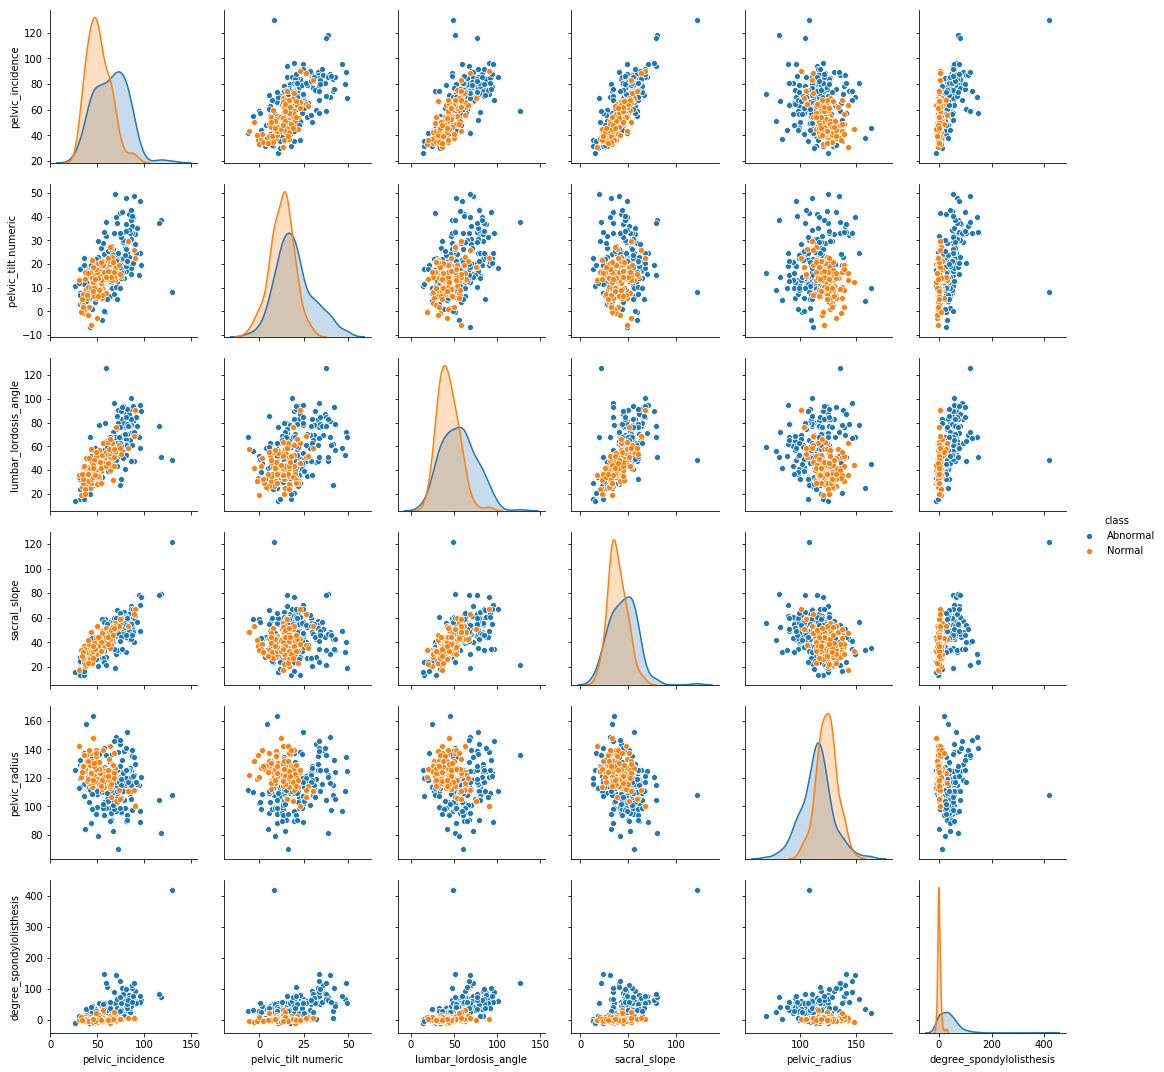

In [61]:
sns.pairplot(df_2C, hue = 'class')
# From Pairplot we observed that the diagonal plots for 2 classes are overlapping hence we may get low knn accuracy score.

# Encode the Class variable to integer.

In [5]:
le = LabelEncoder()
df_2c['class'] = le.fit_transform(df_2c['class'])

In [42]:
df_2c['class'].value_counts()

0    210
1    100
Name: class, dtype: int64

In [43]:
le.classes_

array(['Abnormal', 'Normal'], dtype=object)

In [49]:
le.inverse_transform([0, 1])     #Checking invserse transform

array(['Abnormal', 'Normal'], dtype=object)

In [6]:
df_2c.dtypes     #now class column is converted to int

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [7]:
x = df_2c.drop('class', axis = 1)
y = df_2c['class']

# As taught in our class, Here I shall first split data as train and test
# And then will Normalize the data X

# Split the data as train and test with a ratio of 70:30.¶

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 9)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((217, 6), (93, 6), (217,), (93,))

# Normalize your Data (X) to get values between 0 to 1.

In [0]:
# Since normalization to be done to get values in range 0 to 1, we shall use MinMaxScaler

In [9]:
scal = MinMaxScaler()
X_train = scal.fit_transform(x_train)
X_test = scal.transform(x_test)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [12]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train,y_train)
ytrain_pred = knn.predict(X_train)
ytest_pred = knn.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [13]:
knn.score(X_test,y_test), knn.score(X_train,y_train)

(0.8279569892473119, 0.8709677419354839)

The knn score for test data set is 0.827

In [106]:
# Lets try to calculate same using Accuracy_score

In [14]:
accuracy_score(ytest_pred,y_test), accuracy_score(ytrain_pred,y_train)

(0.8279569892473119, 0.8709677419354839)

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

Text(0, 0.5, 'score')

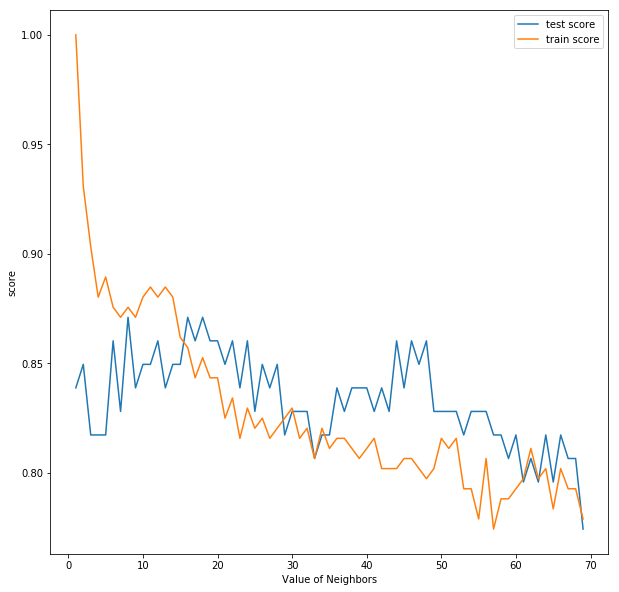

In [16]:
train_score = []
test_score = []
for k in range(1,70):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train,y_train)
    test_score.append(knn.score(X_test,y_test))
    train_score.append(knn.score(X_train,y_train))
    
k = np.arange(1,70)
plt.figure(figsize = (10,10))
plt.plot( k, test_score, label = 'test score')
plt.plot( k,train_score, label = 'train score')
plt.legend()
plt.xlabel('Value of Neighbors')
plt.ylabel('score')


In [19]:
np.max(test_score), np.argmax(test_score)
# For K = 8 we are getting highest value i.e. 0.87 of accuracy of test data.

(0.8709677419354839, 7)

## Lets apply For loop for diferent values of random state and get the mean score value for each K

Text(0, 0.5, 'score')

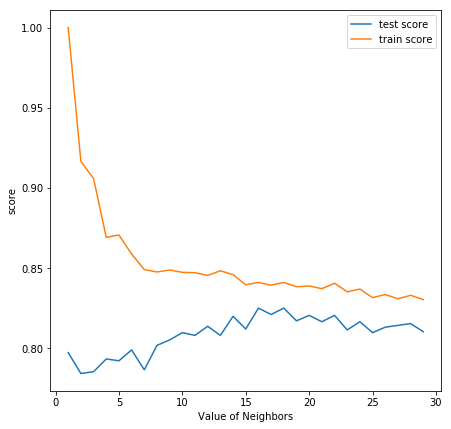

In [20]:
kvalue = np.arange(1,30)
train_score = np.empty(len(kvalue))
test_score = np.empty(len(kvalue))
#Loop for different values of neighbors
for i,j in enumerate(kvalue):
    train = []
    test = []
    #Loop for different values of random_state
    for r in range(1,20):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = r)
        scal = MinMaxScaler()
        X_train = scal.fit_transform(x_train)
        X_test = scal.transform(x_test)
        knn = KNeighborsClassifier(n_neighbors= j)
        knn.fit(X_train,y_train)
        test.append(knn.score(X_test,y_test))
        train.append(knn.score(X_train,y_train))
    # Taking mean of all performance score for different randome states. And storing it for each neighbors
    test_score[i] = np.mean(test)
    train_score[i] = np.mean(train)
plt.figure(figsize = (7,7))
plt.plot( kvalue, test_score, label = 'test score')
plt.plot( kvalue, train_score, label = 'train score')
plt.legend()
plt.xlabel('Value of Neighbors')
plt.ylabel('score')

In [87]:
# After taking mean for 1 to 20 Randome states, we can say from above graph that K = 18 shall give best test score. The score is 0.825

In [21]:
np.max(test_score), np.argmax(test_score)

(0.8251273344651952, 17)

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [22]:
df_3c = pd.read_csv('3Classdata.csv')


Explore the data set.Get necessary information about the data.
Look at the head and tail of dataset. Find the missing value. Look at the unique values of class values. Look at the distribution of class values and other attributes. Get the datatype information about the dataset Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [23]:
df_3c.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [190]:
df_3c.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [193]:
df_3c.isnull().sum()
# No null values are there.

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [194]:
df_3c.shape

(310, 7)

In [196]:
df_3c['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [197]:
df_3c.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [198]:
df_3c.skew()

pelvic_incidence            0.520440
pelvic_tilt                 0.676553
lumbar_lordosis_angle       0.599451
sacral_slope                0.792577
pelvic_radius              -0.176835
degree_spondylolisthesis    4.317954
dtype: float64

In [1]:
#There is highiest skewness in degree_spondylolisthesis, it is right skewed.

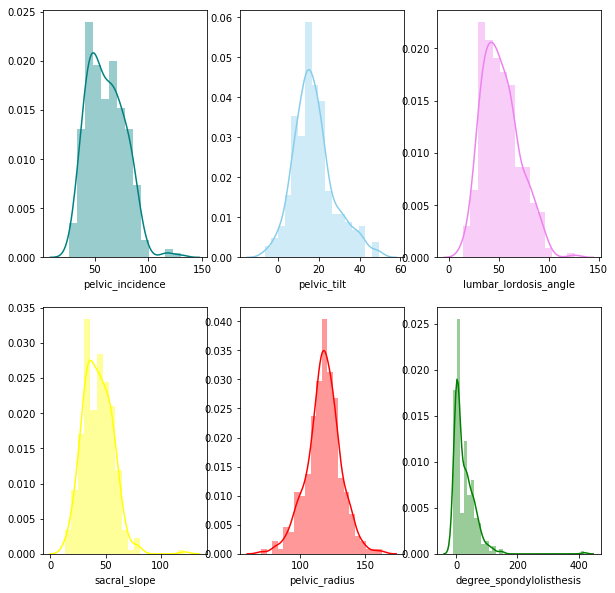

In [208]:
fig, axes = plt.subplots(figsize = (10,10), nrows = 2, ncols = 3)
sns.distplot(df_3c['pelvic_incidence'], ax = axes[0,0], color = 'teal')
sns.distplot(df_3c['pelvic_tilt'], ax = axes[0,1], color = 'skyblue')
sns.distplot(df_3c['lumbar_lordosis_angle'], ax = axes[0,2], color = 'violet')
sns.distplot(df_3c['sacral_slope'], ax = axes[1,0], color = 'yellow')
sns.distplot(df_3c['pelvic_radius'], ax = axes[1,1], color = 'red')
sns.distplot(df_3c['degree_spondylolisthesis'], ax = axes[1,2], color = 'green')


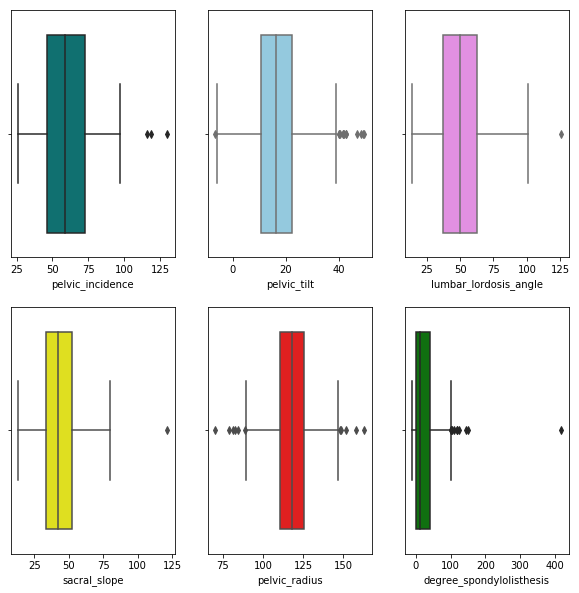

In [7]:
fig , axes = plt.subplots(figsize =(10,10), nrows = 2, ncols = 3)
sns.boxplot(df_3c['pelvic_incidence'], ax = axes[0,0], color = 'teal')
sns.boxplot(df_3c['pelvic_tilt'], ax = axes[0,1], color = 'skyblue')
sns.boxplot(df_3c['lumbar_lordosis_angle'], ax = axes[0,2], color = 'violet')
sns.boxplot(df_3c['sacral_slope'], ax = axes[1,0], color = 'yellow')
sns.boxplot(df_3c['pelvic_radius'], ax = axes[1,1], color = 'red')
sns.boxplot(df_3c['degree_spondylolisthesis'], ax = axes[1,2], color = 'green')

# From above boxplots we can conclude that -
# pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis have outliers at right tail
# pelvic_radius has outliers at both left and right tail.

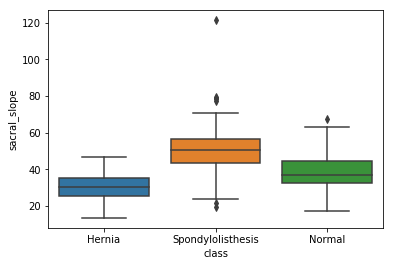

In [23]:
sns.boxplot('class', 'sacral_slope',  data = df_3c )

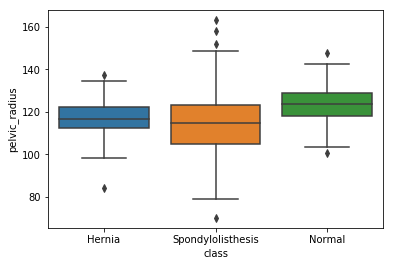

In [42]:
sns.boxplot('class', 'pelvic_radius',  data = df_3c )

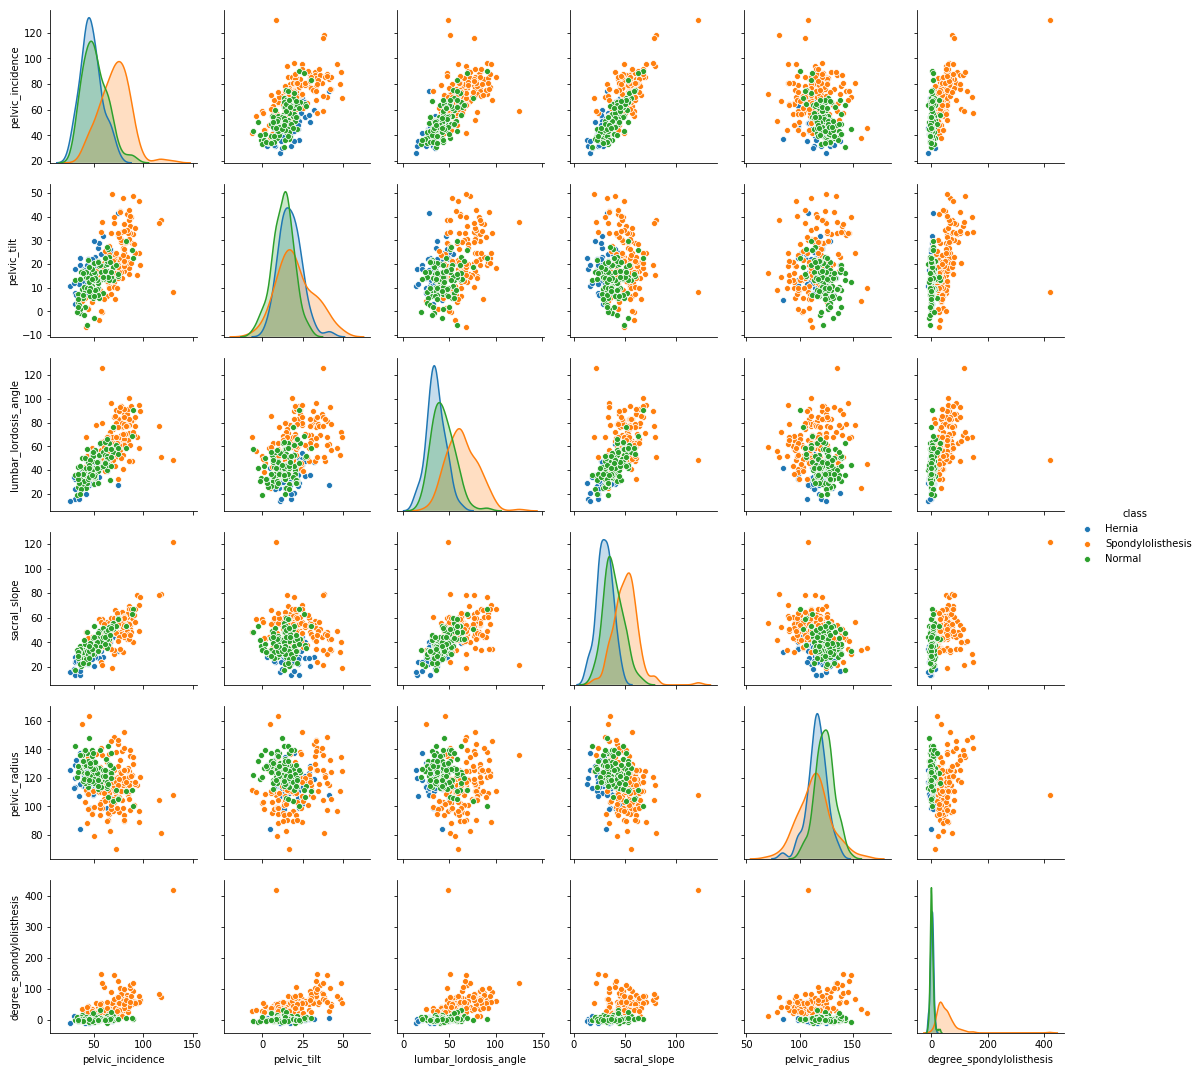

In [41]:
sns.pairplot(df_3c, hue = 'class')
# From Pairplot we observed that the diagonal plots for all 3 classes are overlapping hence we may get low knn accuracy score.

## Encode the Class variable to integer.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [25]:
df_3c['class'] = le.fit_transform(df_3c['class'])
df_3c['class'].unique()

array([0, 2, 1], dtype=int64)

In [26]:
df_3c['class'].value_counts()

2    150
1    100
0     60
Name: class, dtype: int64

In [6]:
le.classes_

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

In [7]:
le.inverse_transform([0,1,2])

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.


In [27]:
df_3c.head()
x = df_3c.drop('class', axis = 1)
y = df_3c['class']
x.shape,y.shape

((310, 6), (310,))

# As taught in our class, Here I shall first split data as train and test
# And then will Normalize the data X
# Split the data as train and test with a ratio of 70:30.

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 5)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((217, 6), (93, 6), (217,), (93,))

# Normalize your Data (X) to get values between 0 to 1.

In [29]:
scal = MinMaxScaler()
X_train = scal.fit_transform(x_train)
X_test = scal.transform(x_test)

# Build the KNN model using Train Dataset and predict the class on test dataset.


In [30]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
ytrain_pred = knn.predict(X_train)
ytest_pred = knn.predict(X_test)


# Calculate the performance score of of your classification on test dataset.
### Hint- You can use knn.score( ) function.

In [31]:
print(knn.score(X_test,y_test))
print(knn.score(X_train,y_train))

0.8279569892473119
0.8525345622119815


# What is the best K value for your classifcation?
### Find at which k value you get the best score.

Text(0, 0.5, 'score')

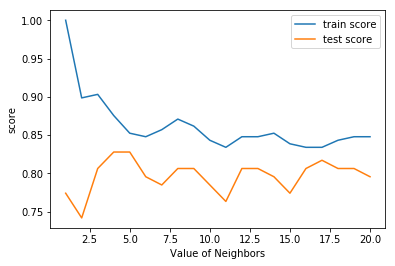

In [32]:
train_score = []
test_score = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
k = np.arange(1,21)
plt.plot(k,train_score,label = 'train score')
plt.plot(k,test_score,label = 'test score')
plt.legend()
plt.xlabel('Value of Neighbors')
plt.ylabel('score')


In [79]:
# So for K = 4 we are getting highest accuracy score for test data which is 0.82

In [33]:
np.max(test_score), np.argmax(test_score)

(0.8279569892473119, 3)

Text(0, 0.5, 'score')

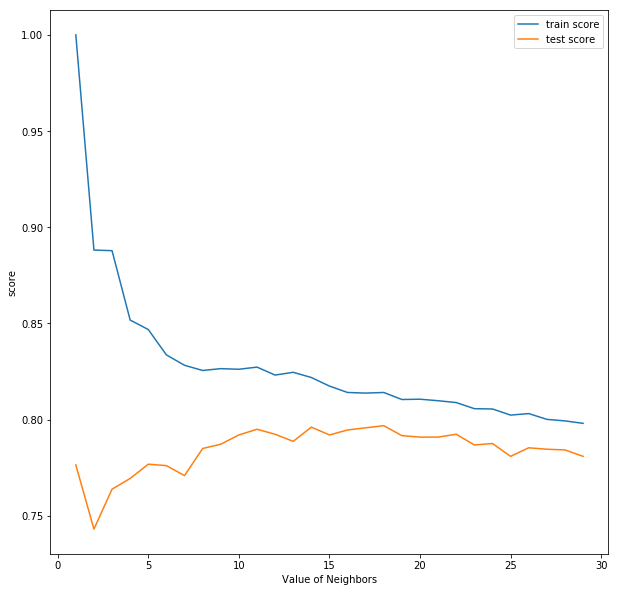

In [34]:
kvalue = np.arange(1,30)
train_plotscore = np.empty(len(kvalue))
test_plotscore = np.empty(len(kvalue))
#Loop for different values of neighbors
for i,j in enumerate(kvalue):
    train = []
    test = []
     #Loop for different values of random_state
    for r in range(1,30):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = r)
        scal = MinMaxScaler()
        X_train = scal.fit_transform(x_train)
        X_test = scal.transform(x_test)
        knn = KNeighborsClassifier(n_neighbors = j)
        knn.fit(X_train,y_train)
        train.append(knn.score(X_train,y_train))
        test.append(knn.score(X_test,y_test))
     # Taking mean of all performance score for different randome states. And storing it for each neighbors
    train_plotscore[i] = np.mean(train)
    test_plotscore[i] = np.mean(test)
plt.figure(figsize = (10,10))
plt.plot(kvalue,train_plotscore,label = 'train score')
plt.plot(kvalue,test_plotscore,label = 'test score')
plt.legend()
plt.xlabel('Value of Neighbors')
plt.ylabel('score')


In [64]:
test_plotscore.max()

array([0.77641824, 0.74304783, 0.76381164, 0.76937338, 0.77678902,
       0.77604746, 0.77085651, 0.78494624, 0.78717093, 0.7919911 ,
       0.79495736, 0.79236188, 0.78865406, 0.79606971, 0.7919911 ,
       0.79458658, 0.79569892, 0.79681127, 0.79162032, 0.79087875,
       0.79087875, 0.79236188, 0.78680015, 0.78754171, 0.78086763,
       0.78531702, 0.78457545, 0.78420467, 0.78086763])

In [35]:
test_plotscore.argmax(), test_plotscore.max()

(17, 0.7968112717834631)

In [86]:
# Approx for k = 18 we are getting highest Score of 0.7968 for test data after taking mean score for 0 to 30 value of Random state
# Also from Pairplot we observed that the diagonal plots for all 3 classes are overlapping hence we are not getting very high sco